In [3]:
import os


from facial_detection import FaceDetection

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

facesImgPath = "./images"
imgList = os.listdir(facesImgPath)
cascadesPath = "./Cascades"
cascadeList = os.listdir(cascadesPath)

def main_haarscade(image_name, cascade_name, height, width, scaleFactor, minNeighbors, minSize, maxSize):
    print("Haarscade Method")
    faceDetection = FaceDetection(facesImgPath + "/" + image_name)
    faceDetection.ResizeImage(height, width)
    faceDetection.FaceDetectHaarscade(cascadesPath + "/" + cascade_name, scaleFactor, minNeighbors, minSize, maxSize)
    faceDetection.DisplayImage()
    
interact(main_haarscade,
         image_name = imgList,
         cascade_name = cascadeList,
         height = widgets.IntSlider(value = 500, min = 1, max= 1000, step = 1),
         width = widgets.IntSlider(value = 500, min = 1, max= 1000, step = 1),
         scaleFactor = widgets.FloatSlider(value = 1.1, min = 1.01, max= 5, step = 0.01),
         minNeighbors = widgets.IntSlider(value = 3, min = 1, max= 10, step = 1),
         minSize = widgets.IntSlider(value = 50, min = 1, max= 1000, step = 1),
         maxSize = widgets.IntSlider(value = 100, min = 1, max= 1000, step = 1)
         )

interactive(children=(Dropdown(description='image_name', options=('faces_emotions.png', 'gabriel.png', 'megan.…

<function __main__.main_haarscade(image_name, cascade_name, height, width, scaleFactor, minNeighbors, minSize, maxSize)>

In [2]:
import os


from facial_detection import FaceDetection

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

facesImgPath = "./images"
imgList = os.listdir(facesImgPath)

def main_hog(image_name, height, width, scaleFactor):
    print("HOG Method")
    faceDetection = FaceDetection(facesImgPath + "/" + image_name)
    faceDetection.ResizeImage(height, width)
    faceDetection.FaceDetectHOG(scaleFactor)
    faceDetection.DisplayImage()
    
interact(main_hog,
         image_name = imgList,
         height = widgets.IntSlider(value = 500, min = 1, max= 1000, step = 1),
         width = widgets.IntSlider(value = 500, min = 1, max= 1000, step = 1),
         scaleFactor = widgets.IntSlider(value = 1, min = 0, max= 5, step = 1)
         )

interactive(children=(Dropdown(description='image_name', options=('faces_emotions.png', 'gabriel.png', 'megan.…

<function __main__.main_hog(image_name, height, width, scaleFactor)>

In [1]:
import os


from facial_detection import FaceDetection

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

facesImgPath = "./images"
imgList = os.listdir(facesImgPath)
weightsPath = "./Weights"
weight_name = "mmod_human_face_detector.dat"

def main_CNN(image_name, scaleFactor, confidence):
    print("CNN Method")
    faceDetection = FaceDetection(facesImgPath + "/" + image_name)
    #faceDetection.ResizeImage(height, width)
    faceDetection.FaceDetectCNN(weightsPath + "/" + weight_name, scaleFactor, confidence)
    faceDetection.DisplayImage()
    
interact(main_CNN,
         image_name = imgList,
         #height = widgets.IntSlider(value = 500, min = 1, max= 1000, step = 1),
         #width = widgets.IntSlider(value = 500, min = 1, max= 1000, step = 1),
         scaleFactor = widgets.IntSlider(value = 1, min = 0, max= 2, step = 1),
         confidence = widgets.FloatSlider(value = 1, min = 0, max= 2, step = 0.001),
         )

interactive(children=(Dropdown(description='image_name', options=('faces_emotions.png', 'gabriel.png', 'megan.…

<function __main__.main_CNN(image_name, scaleFactor, confidence)>

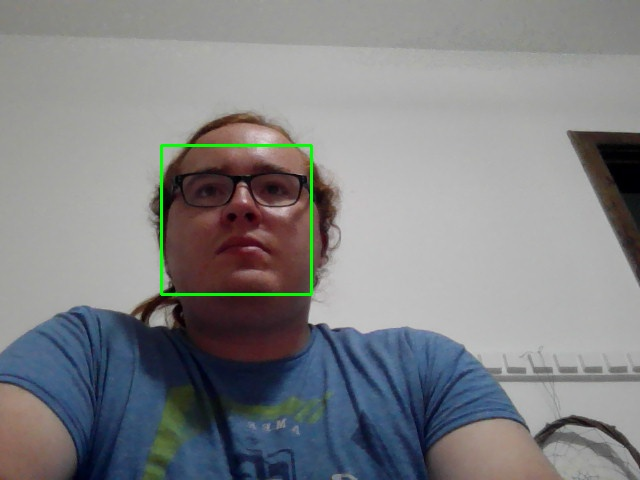

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from IPython.display import display, Image
import ipywidgets as widgets
import threading
import time

from facial_detection import FaceDetection

# Stop button
# ================
stopButton = widgets.ToggleButton(
    value=False,
    description='Stop',
    disabled=False,
    button_style='danger', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='square' # (FontAwesome names without the `fa-` prefix)
)


# Display function
# ================
def view(button):

    facesImgPath = "./images"
    image_name = "test.jpg"
    faceDetection = FaceDetection(facesImgPath + "/" + image_name)
    

    cap = cv2.VideoCapture(0)
    display_handle=display(None, display_id=True)
    i = 0
    while True:
        _, frame = cap.read()
        frame = cv2.flip(frame, 1) # if your camera reverses your image
        faceDetection.lastImage = frame.copy()
        faceDetection.FaceDetectHOG(0)
        _, frame = cv2.imencode('.jpeg', faceDetection.lastImage)
        display_handle.update(Image(data=frame.tobytes()))
        if stopButton.value==True:
            cap.release()
            display_handle.update(None)
            
# Run
# ================
#display(stopButton)
#thread = threading.Thread(target=view, args=(stopButton,))
#thread.start()

view(stopButton)
